In [1]:
from utils_plotting import line_plot_filled, line_plot_with_error_bars, line_plot_filled_epochs, line_plot_compare, bar_plot_compare, line_plot_epochs_compare
from utils_load import load_files_in_folder, extract_data, get_sparsity_info, get_epoch_info, total_time, load_folder, calculate_best_motif

### Lung Dataset

In [2]:
# 'original_set_benchmarks', 'cluster2_benchmarks'
MOTIF = False

results_set_og = load_files_in_folder('100ep_benchmarks\lung_original_benchmarks')
results_listd = extract_data(results_set_og)
results_for_plt = get_sparsity_info(results_listd)

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\finnd\AppData\Local\Temp\ipykernel_3584\812384526.py:4: SyntaxWarning: invalid escape sequence '\l'
  results_set_og = load_files_in_folder('100ep_benchmarks\lung_original_benchmarks')


In [4]:
MOTIF = True

results_set_motif = load_files_in_folder('100ep_benchmarks\lung_cluster3_benchmarks')
results_listd_motif = extract_data(results_set_motif)
results_motif_for_plt = get_sparsity_info(results_listd_motif)

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\finnd\AppData\Local\Temp\ipykernel_3584\3982061615.py:3: SyntaxWarning: invalid escape sequence '\l'
  results_set_motif = load_files_in_folder('100ep_benchmarks\lung_cluster3_benchmarks')


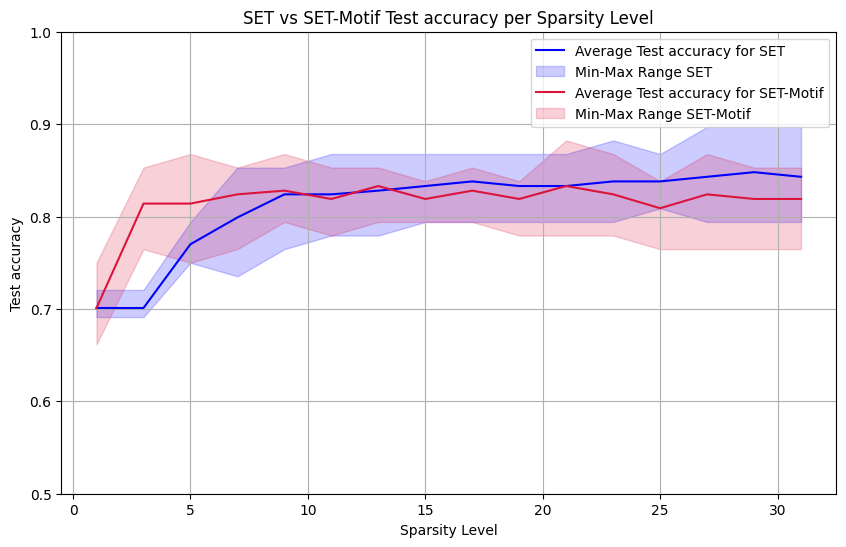

In [30]:
if MOTIF:
    # variable choose from: [time, train_accuracy, test_accuracy]
    line_plot_compare(results_for_plt, results_motif_for_plt, variable='test_accuracy')

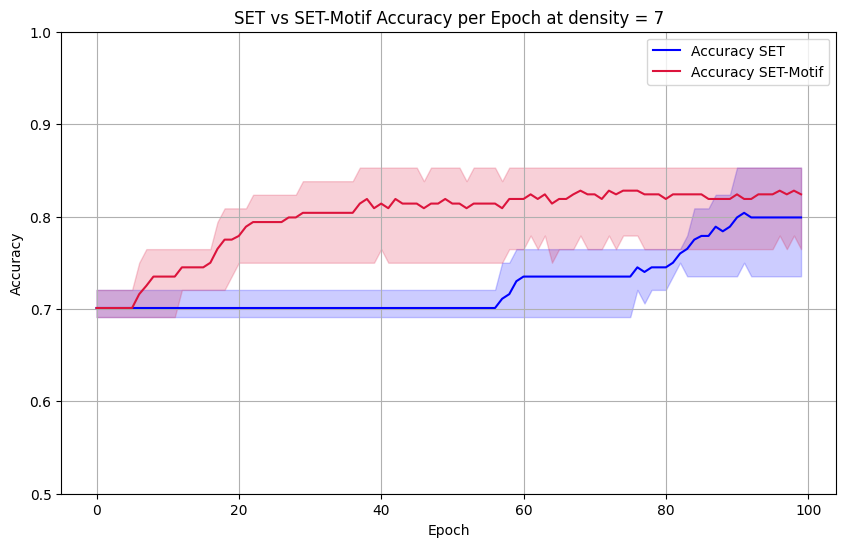

In [31]:
# for epoch info
set_epochs = get_epoch_info(results_listd)
set_motif_epochs = get_epoch_info(results_listd_motif)
line_plot_epochs_compare(set_epochs, set_motif_epochs, sparsity=7)

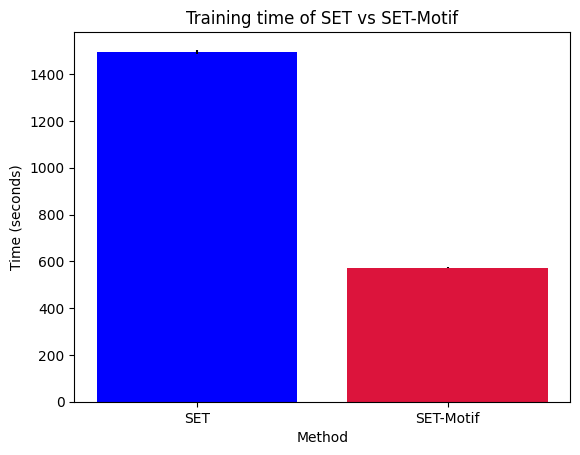

In [28]:
#  for time comparision
time_set = total_time(results_for_plt)
time_set_motif = total_time(results_motif_for_plt)

bar_plot_compare(time_set, time_set_motif)

### FMNIST Dataset

In [3]:
# 'original_set_benchmarks', 'full_receptive_f3_benchmarks'
MOTIF = False

results_set_og_2 = load_files_in_folder('100ep_benchmarks/fmnist_original_benchmarks')
results_listd_2 = extract_data(results_set_og_2)
results_for_plt_2 = get_sparsity_info(results_listd_2)

In [4]:
MOTIF = True

results_set_motif_2 = load_files_in_folder('100ep_benchmarks/fmnist_rcf3_benchmarks')
results_listd_motif_2 = extract_data(results_set_motif_2)
results_motif_for_plt_2 = get_sparsity_info(results_listd_motif_2)

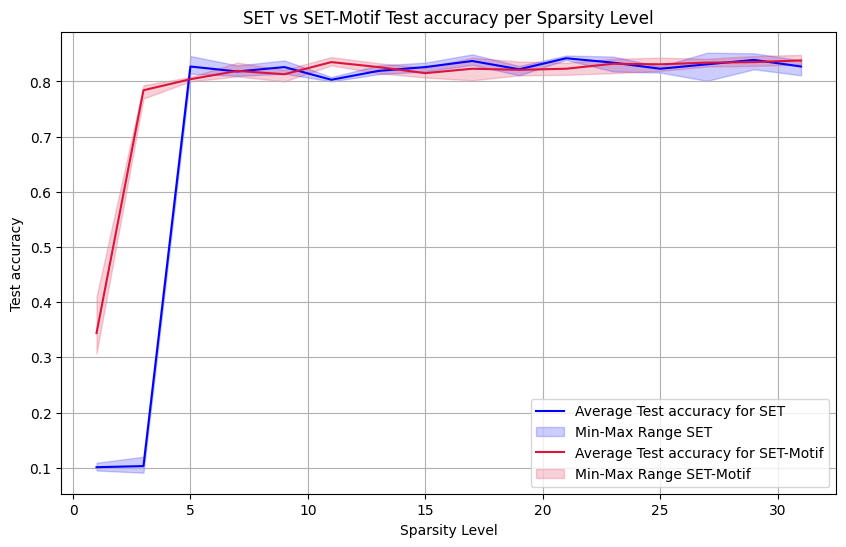

In [5]:
if MOTIF:
    # variable choose from: [time, train_accuracy, test_accuracy]
    line_plot_compare(results_for_plt_2, results_motif_for_plt_2, variable='test_accuracy')

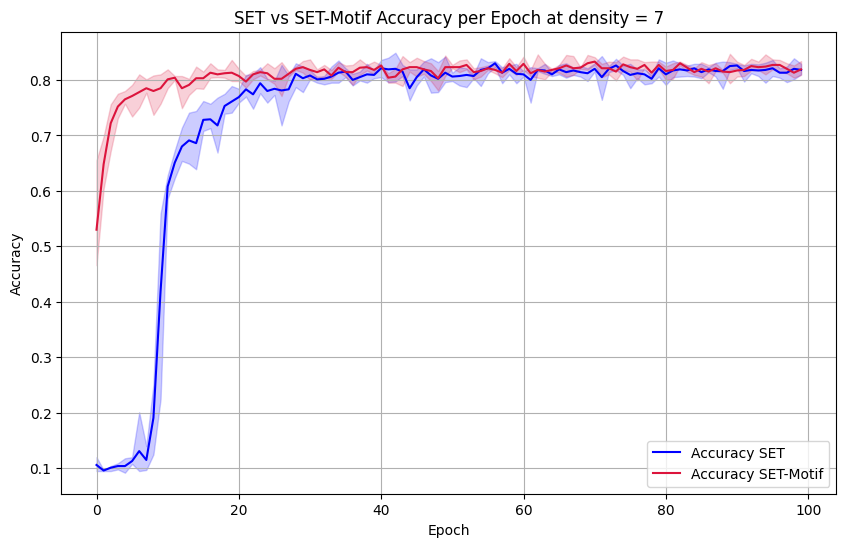

In [6]:
# for epoch info
set_epochs_2 = get_epoch_info(results_listd_2)
set_motif_epochs_2 = get_epoch_info(results_listd_motif_2)
line_plot_epochs_compare(set_epochs_2, set_motif_epochs_2, sparsity=7)

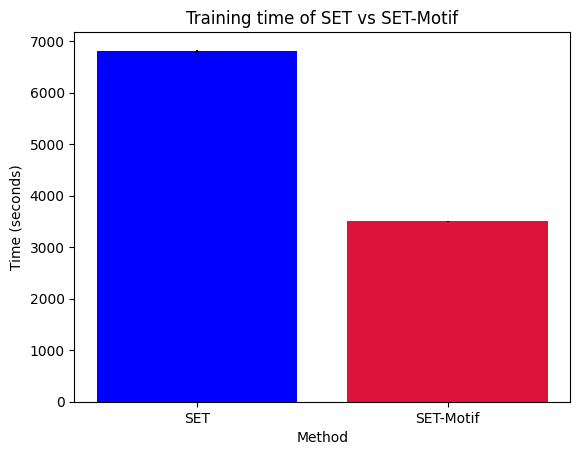

In [20]:
#  for time comparision
time_set_2 = total_time(results_for_plt_2)
time_set_motif_2 = total_time(results_motif_for_plt_2)

bar_plot_compare(time_set_2, time_set_motif_2)

### Motif comparisons

In [9]:
# CALCULATE BEST MOTIF FOR DATASET

results_listd_all, results_for_plt_all = load_folder('all_motif_scores')
scores_motifs = calculate_best_motif(results_listd_all, results_for_plt_all)

For the FMNIST Dataset:
Motif: "Receptive Field" has a composite score of: 0.84
Motif: "Bidirectional" has a composite score of: 0.81
Motif: "Cluster Overlap" has a composite score of: 0.77
Motif: "Cluster" has a composite score of: 0.73
Motif: "Forward" has a composite score of: 0.65
Motif: "Random Motif" has a composite score of: 0.52

For the Lung Dataset:
Motif: "Cluster" has a composite score of: 0.8
Motif: "Cluster Overlap" has a composite score of: 0.78
Motif: "Receptive Field" has a composite score of: 0.73
Motif: "Bidirectional" has a composite score of: 0.72
Motif: "Forward" has a composite score of: 0.59
Motif: "Random Motif" has a composite score of: 0.51


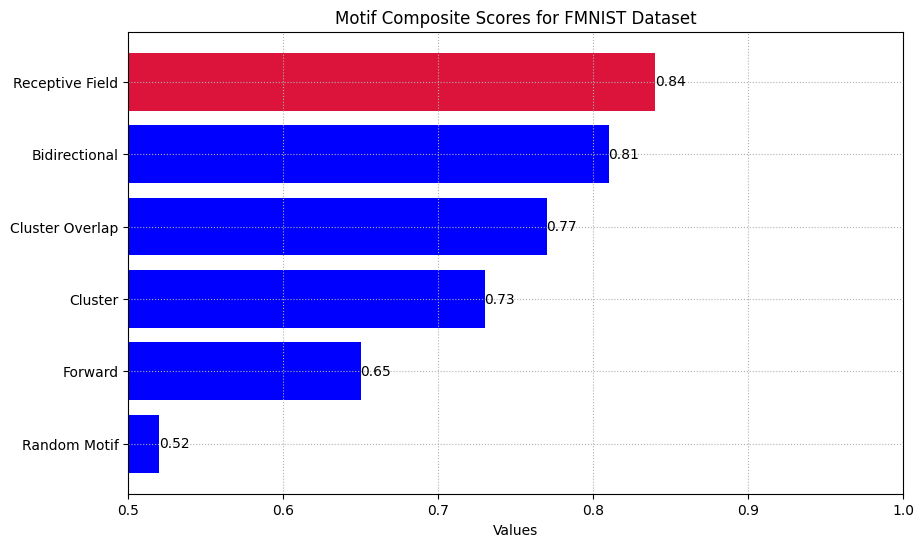

In [1]:
import matplotlib.pyplot as plt

values = [0.84, 0.81, 0.77, 0.73, 0.65, 0.52] #FMNIST
labels = ['Receptive Field', 'Bidirectional', 'Cluster Overlap', 'Cluster', 'Forward', 'Random Motif'] #FMNIST

# Create a color list with the highest value in crimson and others in blue
colors = ['crimson' if i == 0 else 'blue' for i in range(len(values))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colors)

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

plt.xlabel('Values')
plt.title('Motif Composite Scores for FMNIST Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(True, linestyle=':')
plt.xlim(0.5, 1)  # Set x-axis range from 0.5 to 1
plt.show()

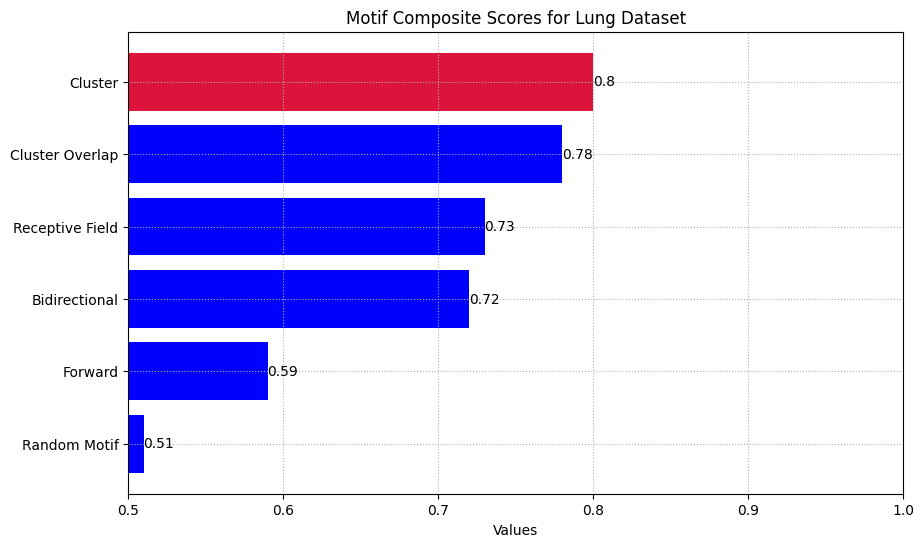

In [2]:
import matplotlib.pyplot as plt

values = [0.80, 0.78, 0.73, 0.72, 0.59, 0.51] #lung
labels = ['Cluster', 'Cluster Overlap', 'Receptive Field', 'Bidirectional', 'Forward', 'Random Motif'] #lung

# Create a color list with the highest value in crimson and others in blue
colors = ['crimson' if i == 0 else 'blue' for i in range(len(values))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colors)

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

plt.xlabel('Values')
plt.title('Motif Composite Scores for Lung Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(True, linestyle=':')
plt.xlim(0.5, 1)  # Set x-axis range from 0.5 to 1
plt.show()

### Init Comparison

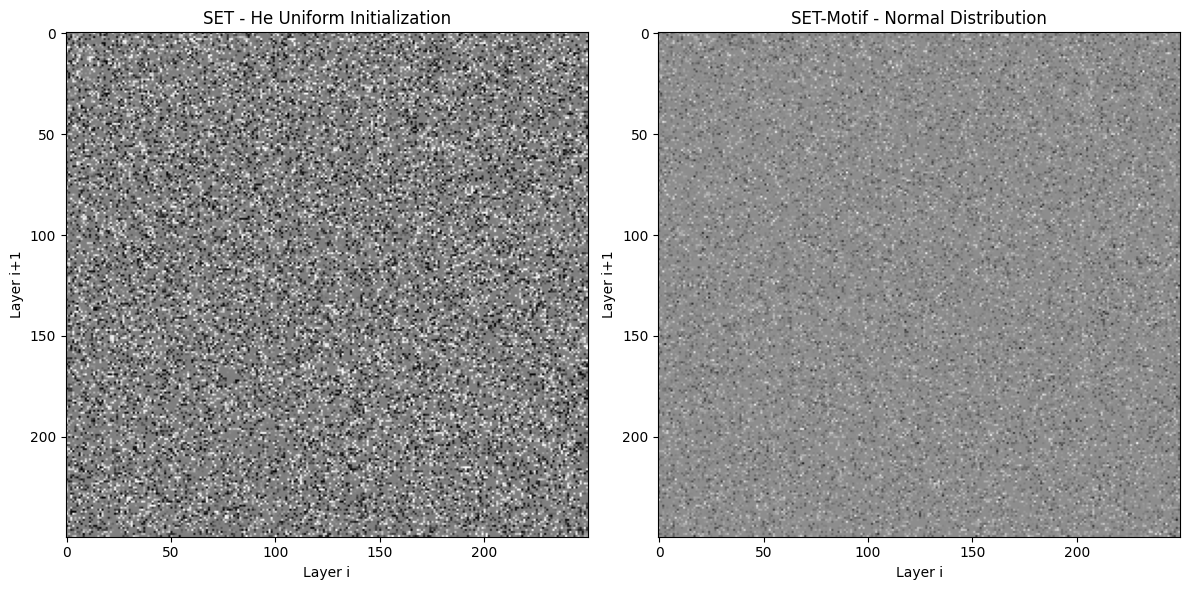

In [2]:
from scipy.sparse import lil_matrix
import numpy as np
import matplotlib.pyplot as plt

def create_sparse_weights(epsilon, n_rows, n_cols):
    # He uniform initialization
    limit = np.sqrt(6. / float(n_rows))

    mask_weights = np.random.rand(n_rows, n_cols)
    prob = 1 - (epsilon * (n_rows + n_cols)) / (n_rows * n_cols)  # normal to have 8x connections

    # generate an Erdos Renyi sparse weights mask
    weights = lil_matrix((n_rows, n_cols))
    n_params = np.count_nonzero(mask_weights[mask_weights >= prob])

    weights[mask_weights >= prob] = np.random.uniform(-limit, limit, n_params)
    return weights


# Removing the limit and using a normal distribution gives better results?
def create_sparse_weights_normal_dist(epsilon, n_rows, n_cols):
    mask_weights = np.random.rand(n_rows, n_cols)
    prob = 1 - (epsilon * (n_rows + n_cols)) / (n_rows * n_cols)  # normal to have 8x connections

    weights = lil_matrix((n_rows, n_cols))
    n_params = np.count_nonzero(mask_weights[mask_weights >= prob])
    weights[mask_weights >= prob] = np.float64(np.random.randn(n_params) / 10)
    return weights


# Parameters for weight creation
epsilon = 60
n_rows, n_cols = 250, 250

# Generate weights
weights_he_uniform = create_sparse_weights(epsilon, n_rows, n_cols).toarray()
weights_normal_dist = create_sparse_weights_normal_dist(epsilon, n_rows, n_cols).toarray()

# Plot the weights
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(weights_he_uniform, cmap='gray', aspect='auto')
axes[0].set_title('SET - He Uniform Initialization')
axes[0].set_xlabel('Layer i')
axes[0].set_ylabel('Layer i+1')

axes[1].imshow(weights_normal_dist, cmap='gray', aspect='auto')
axes[1].set_title('SET-Motif - Normal Distribution')
axes[1].set_xlabel('Layer i')
axes[1].set_ylabel('Layer i+1')

plt.tight_layout()
plt.show()